In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']
sample_size = 9
random_idx = np.random.randint(60000, size = sample_size)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10704\2067925108.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])


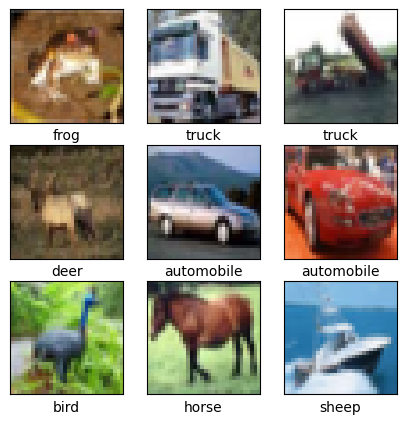

In [5]:
plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

In [6]:
# 평균과 표준편차는 채널별로 구해줍니다.
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, random_state = 777)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다. 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

c:\Dev\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 49s 43ms/step - acc: 0.3271 - loss: 1.8565 - val_acc: 0.5124 - val_loss: 1.3514
Epoch 2/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 44s 40ms/step - acc: 0.5439 - loss: 1.2944 - val_acc: 0.5705 - val_loss: 1.2075
Epoch 3/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - acc: 0.6211 - loss: 1.0922 - val_acc: 0.6038 - val_loss: 1.0988
Epoch 4/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 46s 42ms/step - acc: 0.6689 - loss: 0.9530 - val_acc: 0.6604 - val_loss: 0.9639
Epoch 5/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 46s 42ms/step - acc: 0.7071 - loss: 0.8484 - val_acc: 0.6845 - val_loss: 0.8836
Epoch 6/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - acc: 0.7389 - loss: 0.7586 - val_acc: 0.6997 - val_loss: 0.8524
Epoch 7/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 45s 41ms/step - acc: 0.7713 - loss: 0.6751 - val_acc: 0.6849 - val_loss: 0.9011
Epoch 8/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 45s 41ms/step - acc: 0.7926 - loss: 0.6023 - val_acc: 0.7090 - val_loss: 0.8544
Epoch 9/30
1094/1094 ━━━

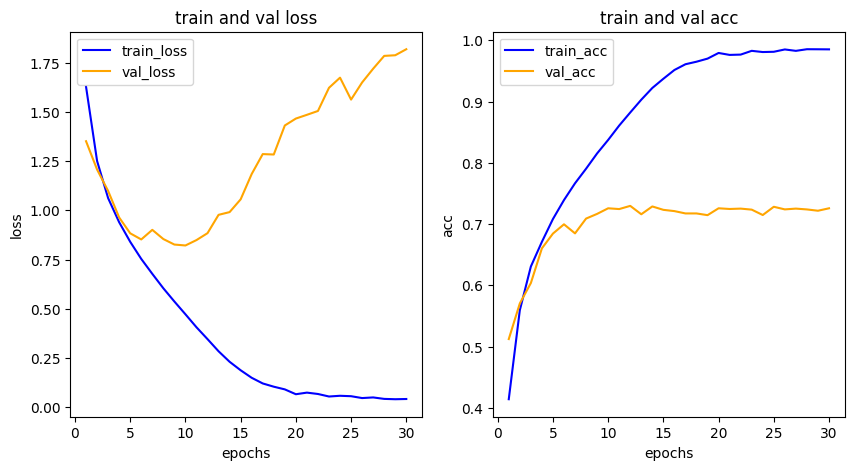

In [9]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

c:\Dev\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10704\3770240249.py:25: RuntimeWarning: invalid value encountered in divide
  x -= x.mean(); x /= x.std()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10704\3770240249.py:27: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


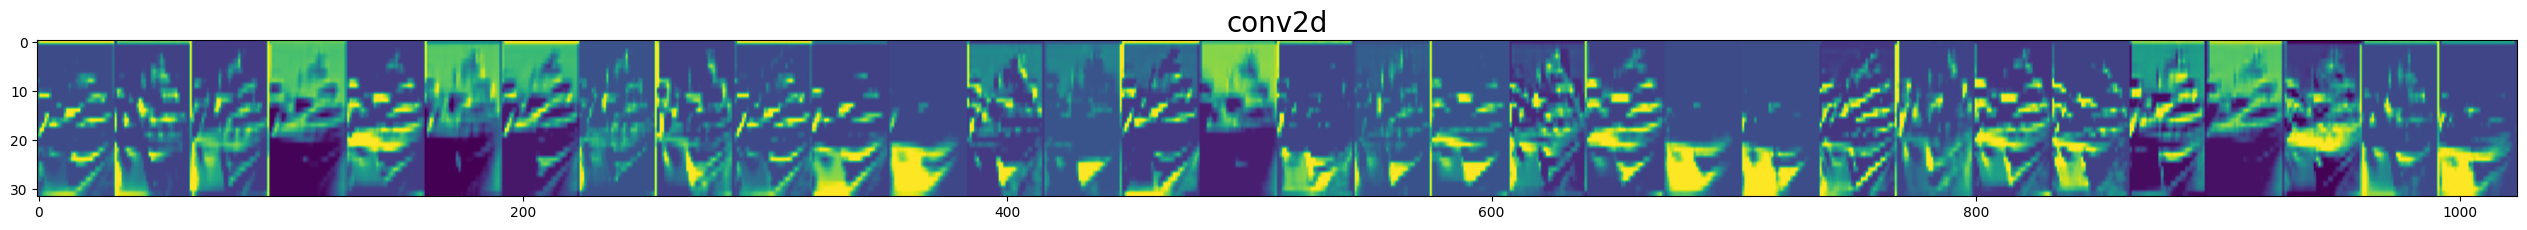

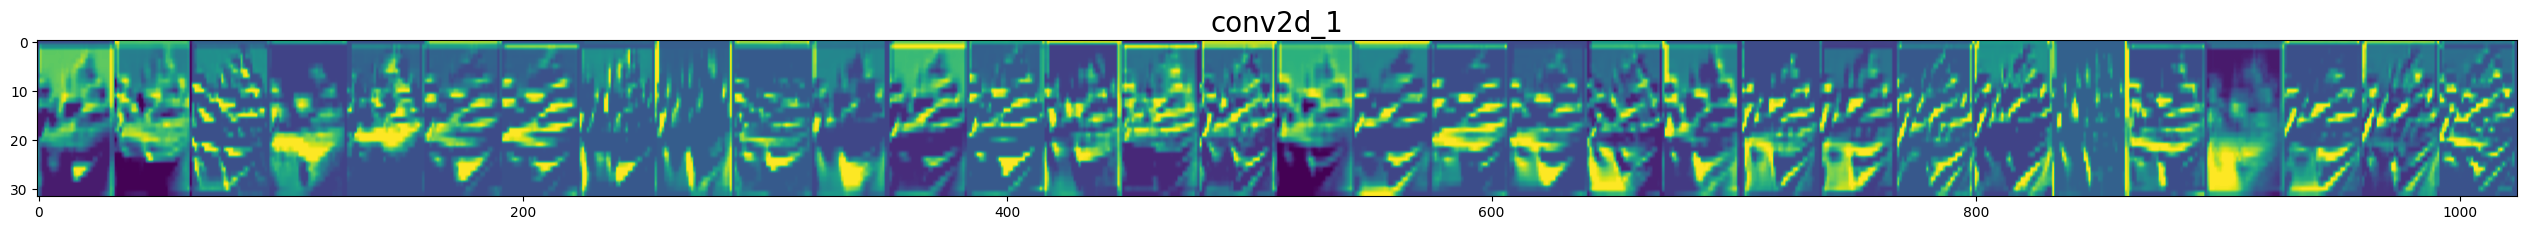

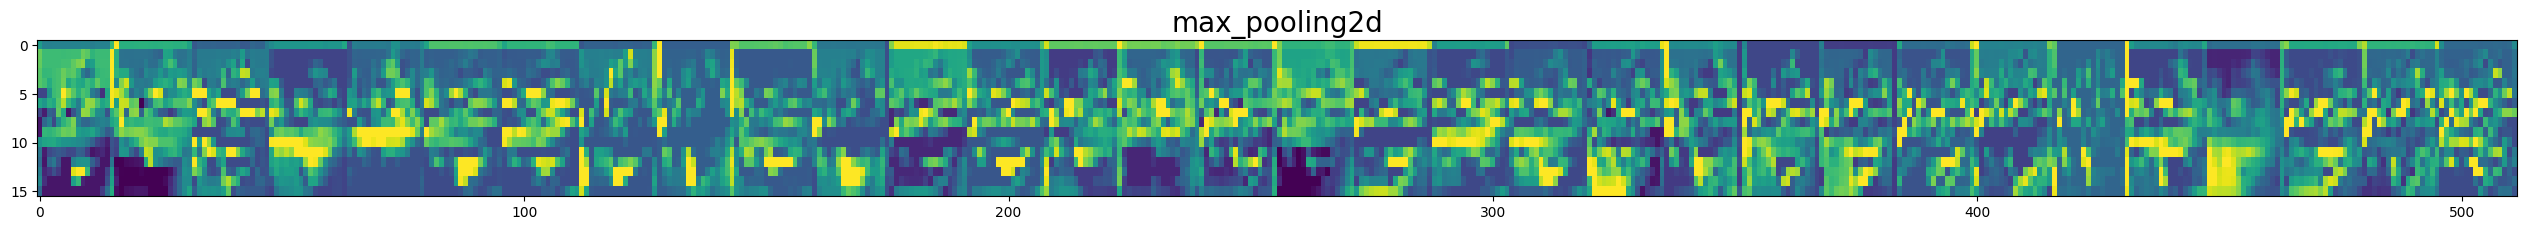

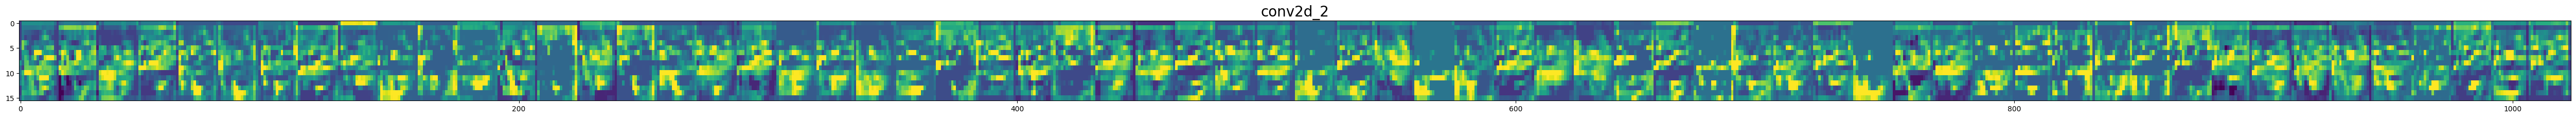

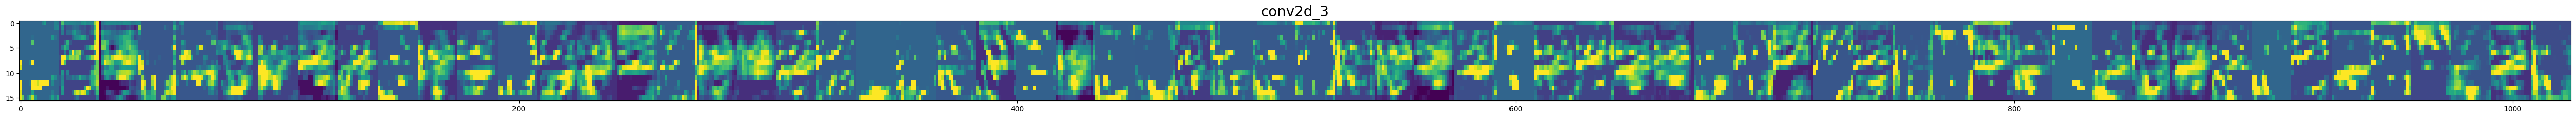

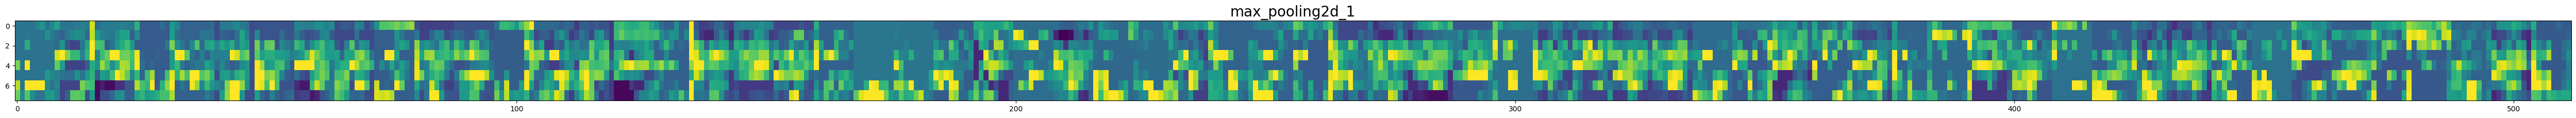

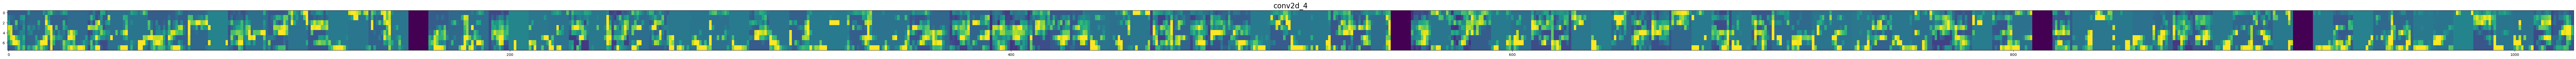

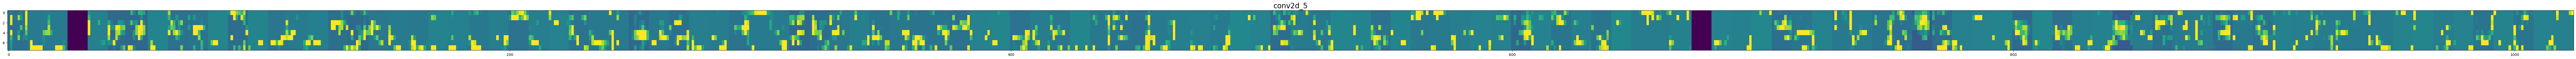

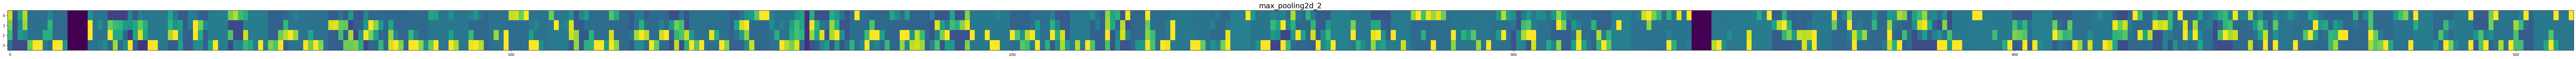

In [15]:
import tensorflow as tf

get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.inputs, outputs = get_output)

# 테스트셋의 두 번째 데이터는 '배'입니다.
test_img = np.expand_dims(x_test[1], axis = 0)
feature_maps = visual_model.predict(test_img)

for layer_name, feature_map in zip(get_layer_name, feature_maps):
    # Dense 층은 제외합니다.
    if(len(feature_map.shape) == 4):
        img_size = feature_map.shape[1]
        features = feature_map.shape[-1]
        
        # (img_size, img_size)의 feature_map이 features 개수만큼 존재합니다.
        display_grid = np.zeros((img_size, img_size * features))
        
        # 각 특징맵을 display_grid 배열에 이어붙입니다.
        for i in range(features):
            x = feature_map[0, :, :, i]
            x -= x.mean(); x /= x.std()
            x *= 64; x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * img_size : (i + 1) * img_size] = x
            
        plt.figure(figsize = (features, 2 + 1./features))
        plt.title(layer_name, fontsize = 20)
        plt.grid(False)
        plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')